**Sentiment Analysis** is used to analyse the emotion of the text. In other words, it is the process of detecting a positive or negative emotion of a text.

So, putting it in simple words, by using sentiment analysis we can detect whether the given sentence, paragraph or a document contains a positive or negative emotion/opinion in it.

## Use-Case of Sentiment Analysis

Since customer nowadays is open and more abrupt in expressing their views about the products or services they use, 

<font color=red>*sentiment analysis becomes an essential tool for the companies to know their customers in-depth and better.
Sentiment Analysis enables companies to know what kind of emotion/sentiment do customers have for them. This can play a huge role because companies can improve their products/services based on the analysis of customer sentiments.*</font>

## Challenges Faced During Analysis of Sentiments

You might be thinking that a sentence having positive or good words will be analysed as positive sentiment & vice-versa a sentence having negative words will be analysed as the negative sentiment.

While the challenge here is that different people write their opinions in different ways, some people express their opinion straight while some may prefer adding sarcasm to their opinion. Also, some might have both positive and negative opinions.

For example: “This car is good but its mileage could’ve been better”

In the above scenario, the opinion of a user is on both sides. But we have a good solution for this situation which can to some extent can make our analysis easier. Let’s have a look at it in the upcoming paragraph.

## Sentiment Analysis on Amazon Data

**Importing All Basic Librarries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly as ply
# import missingno

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

**Reading All Products Review Dataset**

In [2]:
df = pd.read_csv("Amazon_data/AllProductReviews.csv")

In [3]:
df.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No doubt it has a great bass and to a great ex...           3   
1  This  earphones are unreliable, i bought it be...           1   
2  i bought itfor 999,I purchased it second time,...           4   
3  Its sound quality is adorable. overall it was ...           1   
4  Its Awesome... Good sound quality & 8-9 hrs ba...           5   

            Product  
0  boAt Rockerz 255  
1  boAt Rockerz 255  
2  boAt Rockerz 255  
3  boAt Rockerz 255  
4  boAt Rockerz 255

In [4]:
df.shape

(14337, 4)

In [5]:
len(df)

14337

In [6]:
df.iloc[0, 1]

'No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.\n'

**Reading All Products Info Dataset** 

In [7]:
df1 = pd.read_csv("Amazon_data/ProductInfo.csv")

In [8]:
df1.head()

MRP  Price                                    ProductFullName  \
0  2990   1399  boAt Rockerz 255 Sports Bluetooth Wireless Ear...   
1  3999   1099  Flybot Wave in-Ear Sport Wireless Bluetooth Ea...   
2  3999   1099  Flybot Boom Deep Bass in-Ear Wireless Bluetoot...   
3  2000    749  PTron Intunes Pro Headphone Magnetic Earphone ...   
4  5999   2999  Flybot Beat True Wireless Bluetooth Earphones ...   

   ProductShortName                                          ReviewURL  id  
0  boAt Rockerz 255  https://www.amazon.in/255-Bluetooth-Wireless-E...   1  
1       Flybot Wave  https://www.amazon.in/Flybot-Wireless-Bluetoot...   2  
2       Flybot Boom  https://www.amazon.in/Flybot-Wireless-Bluetoot...   3  
3     PTron Intunes  https://www.amazon.in/PTron-Intunes-Pro-Smartp...   4  
4       Flybot Beat  https://www.amazon.in/Flybot-Wireless-Bluetoot...   5

In [9]:
df1.shape

(10, 6)

**Creating Cleaned String of all Reviews Using Nltk and Regex Libraries**

In [10]:
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import re

# lemmatizer = WordNetLemmatizer()

# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', df.ReviewBody[i])
#     review = review.lower()
#     review = review.split()
#     review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus.append(review)

In [11]:
# df2 = pd.DataFrame(corpus, columns=['Review'])
# df2.head()

**Merging Cleaned Reviews Dataset With Original Dataset Using Pandas**

In [12]:
# df2 = pd.merge(df,df2, how='outer', left_index=True, right_index=True)
# df2 = df2.drop('ReviewBody', axis=1)
# df2.head()

**Separate Dataset for Each Product Type is Created**

In [13]:
boat255=df[df.Product=="boAt Rockerz 255"]
boat255.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No doubt it has a great bass and to a great ex...           3   
1  This  earphones are unreliable, i bought it be...           1   
2  i bought itfor 999,I purchased it second time,...           4   
3  Its sound quality is adorable. overall it was ...           1   
4  Its Awesome... Good sound quality & 8-9 hrs ba...           5   

            Product  
0  boAt Rockerz 255  
1  boAt Rockerz 255  
2  boAt Rockerz 255  
3  boAt Rockerz 255  
4  boAt Rockerz 255

In [14]:
flybotwave=df[df.Product=="Flybot Wave"]

flybotboom=df[df.Product=="Flybot Boom"]

PTronintunes=df[df.Product=="PTron Intunes"]

flybotbeat=df[df.Product=="Flybot Beat"]

samsungeo=df[df.Product=="Samsung EO-BG950CBEIN"]

jblt2=df[df.Product=="JBL T205BT"]

jblt1=df[df.Product=="JBL T110BT"]

skullcandy=df[df.Product=="Skullcandy S2PGHW-174"]

seinh=df[df.Product=="Sennheiser CX 6.0BT"]

**Creating a List of All Separated Dataset**

In [15]:
dblist=[boat255,flybotwave,flybotboom,flybotbeat,PTronintunes,samsungeo,jblt2,jblt1,skullcandy,seinh]

## Introducing VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

It is used for sentiment analysis of text which has both the polarities i.e. positive/negative. VADER is used to quantify how much of positive or negative emotion the text has and also the intensity of emotion.

### Advantages

Here are the advantages of using VADER which makes a lot of things easier:

* It does not require any training data.
* It can very well understand the sentiment of a text containing emoticons, slangs, conjunctions, capital words,    punctuations and much more.
* It works excellent on social media text.
* VADER can work with multiple domains.

Let’s start analysing the sentiment using VADER.

Here, SentimentIntensityAnalyzer() is an object and polarity_scores is a method which will  give us scores of the following categories:

*    Positive
*    Negative
*    Neutral
*    Compound

The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).

The more Compound score closer to +1, the higher the positivity of the text.

The compound score will increase as the intensity of the text will increase towards positive.

**Creating Object of Sentiment Intensity Analyzer**

In [16]:
from Amazon_data.SentimentAnalyzer import Analyzer

In [17]:
Analyzer = Analyzer()

**Created Function to Calculate The Score of All Reviews Using Sentiment Intensity Analyzer**

In [18]:
def scores(x):
    list1=[]
    x.reset_index(inplace=True)
    x.drop("index",axis=1,inplace=True)
    for i in x.ReviewBody:
        list1.append(Analyzer.polarity_scores(i))
    x[["Negative","Neutral","Positive","Compound"]]=pd.DataFrame(list1)

In [19]:
%%time
for j in dblist:
    scores(j)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


CPU times: user 13.5 s, sys: 150 ms, total: 13.7 s
Wall time: 14.7 s


## Working on the Boat Rockerz 225

In [20]:
boat255.iloc[1, 3]

'boAt Rockerz 255'

**Compound Score Plot Using Plotly Library**

In [21]:
import plotly.express as px

px.line(y="Compound",data_frame=boat255,width=5000, height=600)

In [22]:
boat255.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No doubt it has a great bass and to a great ex...           3   
1  This  earphones are unreliable, i bought it be...           1   
2  i bought itfor 999,I purchased it second time,...           4   
3  Its sound quality is adorable. overall it was ...           1   
4  Its Awesome... Good sound quality & 8-9 hrs ba...           5   

            Product  Negative  Neutral  Positive  Compound  
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580  
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528  
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569  
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779  
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831

**Separate Columns of Review Sentiment Score is Created**

In [23]:
def classes(x):
    list2=[]
    for i in x["Compound"]:
        if i>= 0.05:
            list2.append("Positive")
        elif i<= -0.05:
            list2.append("Negative")
        else:
            list2.append("Neutral")
    x["Sentiment_Score"]=list2

In [24]:
for j in dblist:
    classes(j)

<ipython-input-23-1bc051a30e40>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
boat255.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No doubt it has a great bass and to a great ex...           3   
1  This  earphones are unreliable, i bought it be...           1   
2  i bought itfor 999,I purchased it second time,...           4   
3  Its sound quality is adorable. overall it was ...           1   
4  Its Awesome... Good sound quality & 8-9 hrs ba...           5   

            Product  Negative  Neutral  Positive  Compound Sentiment_Score  
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580        Negative  
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528        Negative  
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569        Positive  
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779        Positive  
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831        Positive

<AxesSubplot:>

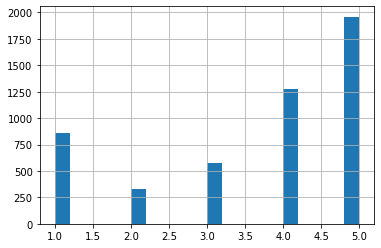

In [26]:
boat255['ReviewStar'].hist(bins=20)

In [27]:
boat255["Sentiment_Score"].value_counts()

Positive    3233
Negative    1303
Neutral      464
Name: Sentiment_Score, dtype: int64

**Pie Plot for Sentiment Score Using Plotly Library**

In [28]:
import plotly.graph_objs as go

Pos_no=boat255[boat255.Sentiment_Score=="Positive"]["Sentiment_Score"].count()
Neg_no=boat255[boat255.Sentiment_Score=="Negative"]["Sentiment_Score"].count()
Neu_no=boat255[boat255.Sentiment_Score=="Neutral"]["Sentiment_Score"].count()
labels = ["Positive Comments","Negative Comments","Neutral Comments"]
values = [Pos_no,Neg_no,Neu_no]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.5)])
fig.show()

**Creating Cleaned String of all Reviews Using Nltk and Regex Libraries**

In [29]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

lemmatizer = WordNetLemmatizer()
def CleanString(x):
    corpus = []
    for i in range(0, len(x)):
        review = x.ReviewBody[i]
        review = review.title()
        review = review.split()
        review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    x["ReviewBody"]=corpus

In [30]:
for j in dblist:
    CleanString(j)

<ipython-input-29-9df07735f437>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
boat255.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No Doubt It Has A Great Bass And To A Great Ex...           3   
1  This Earphones Are Unreliable, I Bought It Bef...           1   
2  I Bought Itfor 999,I Purchased It Second Time,...           4   
3  Its Sound Quality Is Adorable. Overall It Was ...           1   
4  Its Awesome... Good Sound Quality & 8-9 Hrs Ba...           5   

            Product  Negative  Neutral  Positive  Compound Sentiment_Score  
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580        Negative  
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528        Negative  
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569        Positive  
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779        Positive  
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831        Positive

In [32]:
from textblob import TextBlob

def keys(x):
    a = [None] * len(x)  # Creating lists of size dataset
    for i in range(0,(len(x)-1)):
        list3=[]
        blob = TextBlob(x.iloc[i][1])
        for word, tag in blob.tags:
            if (tag=="JJ")| (tag=="VBN")| (tag=="NNS")| (tag=="NN"):
                list3.append(word.lemmatize())
            a[i]=list3
    x["Keywords"]=a    

In [33]:
for j in dblist:
    keys(j)

<ipython-input-32-8cbec9ebfd87>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
boat255.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No Doubt It Has A Great Bass And To A Great Ex...           3   
1  This Earphones Are Unreliable, I Bought It Bef...           1   
2  I Bought Itfor 999,I Purchased It Second Time,...           4   
3  Its Sound Quality Is Adorable. Overall It Was ...           1   
4  Its Awesome... Good Sound Quality & 8-9 Hrs Ba...           5   

            Product  Negative  Neutral  Positive  Compound Sentiment_Score  \
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580        Negative   
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528        Negative   
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569        Positive   
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779        Positive   
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831        Positive   

                                            Keywords  
0  [Doubt, Great, Than, Pain, Removed, Wires, Low...  
1  [Earphones, Days, Right, Parts, Much, Thing, G...  
2                      [Second, Devices, Good, Used]  
3                             [Overall, Good, Weeks]  
4        [8-9, 😉, Rupees, Bad, Packaging, Packaging]

**Removing Stopwords and Tokenizing The Reviews By Creating a Filter Column**

In [35]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords=set(stopwords.words("english"))

def filtered(x):
    a = [None] * len(x) # Creating lists of size dataset
    for i in range(0,(len(x)-1)):
        list4=[]
        blob = word_tokenize(x.iloc[i][1])
        for word in blob:
            if word not in stopwords:
                list4.append(word)
            a[i]=list4
    x["Filter"]=a    

In [36]:
for j in dblist:
    filtered(j)

<ipython-input-35-b5092f8fcf9c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
boat255.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No Doubt It Has A Great Bass And To A Great Ex...           3   
1  This Earphones Are Unreliable, I Bought It Bef...           1   
2  I Bought Itfor 999,I Purchased It Second Time,...           4   
3  Its Sound Quality Is Adorable. Overall It Was ...           1   
4  Its Awesome... Good Sound Quality & 8-9 Hrs Ba...           5   

            Product  Negative  Neutral  Positive  Compound Sentiment_Score  \
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580        Negative   
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528        Negative   
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569        Positive   
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779        Positive   
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831        Positive   

                                            Keywords  \
0  [Doubt, Great, Than, Pain, Removed, Wires, Low...   
1  [Earphones, Days, Right, Parts, Much, Thing, G...   
2                      [Second, Devices, Good, Used]   
3                             [Overall, Good, Weeks]   
4        [8-9, 😉, Rupees, Bad, Packaging, Packaging]   

                                              Filter  
0  [No, Doubt, It, Has, A, Great, Bass, And, To, ...  
1  [This, Earphones, Are, Unreliable, ,, I, Bough...  
2  [I, Bought, Itfor, 999, ,, I, Purchased, It, S...  
3  [Its, Sound, Quality, Is, Adorable, ., Overall...  
4  [Its, Awesome, ..., Good, Sound, Quality, &, 8...

**Creating Separate Lists of Keywords Category Wise**

In [38]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

test_subset=[]
for sublist in boat255.Filter:
    if sublist != None:
        for item in sublist:
            test_subset.append(item)
    else:
        continue

pos_word_list=[]
neg_word_list=[]
neu_word_list=[]

for word in test_subset:
    if (Analyzer.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (Analyzer.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

# print('Positive :',pos_word_list)        
# print('Neutral :',neu_word_list)   
# print('Negative :',neg_word_list)    

In [39]:
def labeled(x):
    a = [None] * len(x)
    for i in range(0,(len(x)-1)):
        list5=[]
        blob = word_tokenize(x.iloc[i][1])
        for word in blob:
            if word in pos_word_list:
                list5.append({'Positive':word})
            elif word in neg_word_list:
                list5.append({'Negative':word})
            else:
                list5.append({'Neutral':word})
            a[i]=list5
    x["LabeledWords"]=a

In [40]:
for j in dblist:
    labeled(j)

<ipython-input-39-e272d82616c2>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
boat255.head(10)

ReviewTitle  \
0              Honest review of an edm music lover\n   
1              Unreliable earphones with high cost\n   
2                         Really good and durable.\n   
3                  stopped working in just 14 days\n   
4   Just Awesome Wireless Headphone under 1000...😉\n   
5                        Charging port not working\n   
6                     Loved the color and sound !!\n   
7                      Great sound with worst mic.\n   
8  Battery life is good enough to keep going all ...   
9                           Very very bad Durabity\n   

                                          ReviewBody  ReviewStar  \
0  No Doubt It Has A Great Bass And To A Great Ex...           3   
1  This Earphones Are Unreliable, I Bought It Bef...           1   
2  I Bought Itfor 999,I Purchased It Second Time,...           4   
3  Its Sound Quality Is Adorable. Overall It Was ...           1   
4  Its Awesome... Good Sound Quality & 8-9 Hrs Ba...           5   
5  After 11 Days, The Charging Port Isn'T Working...           1   
6  Sound-4.5/5Build Quality-4.5/5Battery Life -4/...           4   
7  After One Month Usage Reviewing This .Pros-1- ...           3   
8  I Can’T Get Enough Of This Earphone! The Bass ...           5   
9  The Product Durability Is 1 Month..I Just Lost...           1   

            Product  Negative  Neutral  Positive  Compound Sentiment_Score  \
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580        Negative   
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528        Negative   
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569        Positive   
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779        Positive   
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831        Positive   
5  boAt Rockerz 255     0.000    0.918     0.082    0.5122        Positive   
6  boAt Rockerz 255     0.025    0.721     0.255    0.9607        Positive   
7  boAt Rockerz 255     0.132    0.868     0.000   -0.5849        Negative   
8  boAt Rockerz 255     0.000    0.763     0.237    0.9685        Positive   
9  boAt Rockerz 255     0.123    0.813     0.064   -0.6076        Negative   

                                            Keywords  \
0  [Doubt, Great, Than, Pain, Removed, Wires, Low...   
1  [Earphones, Days, Right, Parts, Much, Thing, G...   
2                      [Second, Devices, Good, Used]   
3                             [Overall, Good, Weeks]   
4        [8-9, 😉, Rupees, Bad, Packaging, Packaging]   
5                       [Days, Year, Warranty, Been]   
6  [Sound-4.5/5Build, Good, Good, Quality, Last, ...   
7                                         [.Pros-1-]   
8                  [Earphone, Good, Same, Earphones]   
9                                             [Lost]   

                                              Filter  \
0  [No, Doubt, It, Has, A, Great, Bass, And, To, ...   
1  [This, Earphones, Are, Unreliable, ,, I, Bough...   
2  [I, Bought, Itfor, 999, ,, I, Purchased, It, S...   
3  [Its, Sound, Quality, Is, Adorable, ., Overall...   
4  [Its, Awesome, ..., Good, Sound, Quality, &, 8...   
5  [After, 11, Days, ,, The, Charging, Port, Isn'...   
6  [Sound-4.5/5Build, Quality-4.5/5Battery, Life,...   
7  [After, One, Month, Usage, Reviewing, This, .P...   
8  [I, Can, ’, T, Get, Enough, Of, This, Earphone...   
9  [The, Product, Durability, Is, 1, Month, .., I...   

                                        LabeledWords  
0  [{'Negative': 'No'}, {'Negative': 'Doubt'}, {'...  
1  [{'Neutral': 'This'}, {'Neutral': 'Earphones'}...  
2  [{'Neutral': 'I'}, {'Neutral': 'Bought'}, {'Ne...  
3  [{'Neutral': 'Its'}, {'Neutral': 'Sound'}, {'N...  
4  [{'Neutral': 'Its'}, {'Positive': 'Awesome'}, ...  
5  [{'Neutral': 'After'}, {'Neutral': '11'}, {'Ne...  
6  [{'Neutral': 'Sound-4.5/5Build'}, {'Neutral': ...  
7  [{'Neutral': 'After'}, {'Neutral': 'One'}, {'N...  
8  [{'Neutral': 'I'}, {'Neutral': 'Can'}, {'Neutr...  
9  [{'Neutral': 'The'}, {'Neutra

In [42]:
boat255.ReviewBody[4]

"Its Awesome... Good Sound Quality & 8-9 Hrs Battery Life... Just Waww Look... 😉 I Brought Just 999 Rupees...But Amazon'S Packageing System Is Very Bad... Very Poor Packaging... Flipcart'S Packaging System Is Much Better Than Amazon..."

In [43]:
boat255.iloc[1, 11]

[{'Neutral': 'This'},
 {'Neutral': 'Earphones'},
 {'Neutral': 'Are'},
 {'Neutral': 'Unreliable'},
 {'Neutral': ','},
 {'Neutral': 'I'},
 {'Neutral': 'Bought'},
 {'Neutral': 'It'},
 {'Neutral': 'Before'},
 {'Neutral': '15'},
 {'Neutral': 'Days'},
 {'Neutral': 'Meanwhile'},
 {'Neutral': 'Right'},
 {'Neutral': 'Side'},
 {'Neutral': 'Ear'},
 {'Neutral': 'Buds'},
 {'Neutral': 'Got'},
 {'Neutral': 'Cracked'},
 {'Neutral': 'Automatically'},
 {'Neutral': 'And'},
 {'Neutral': 'It'},
 {'Neutral': 'Got'},
 {'Neutral': 'Divided'},
 {'Neutral': 'In'},
 {'Neutral': 'Two'},
 {'Neutral': 'Parts'},
 {'Neutral': ','},
 {'Neutral': 'And'},
 {'Neutral': 'Sound'},
 {'Neutral': 'Quality'},
 {'Neutral': 'Is'},
 {'Neutral': 'Also'},
 {'Neutral': 'Not'},
 {'Neutral': 'That'},
 {'Neutral': 'Much'},
 {'Positive': 'Good'},
 {'Neutral': 'But'},
 {'Positive': 'Ok'},
 {'Neutral': ','},
 {'Neutral': 'One'},
 {'Neutral': 'More'},
 {'Neutral': 'Thing'},
 {'Neutral': 'Bass'},
 {'Neutral': 'Is'},
 {'Neutral': 'Not'},
 {'

In [44]:
boat255.to_csv('boat_data.csv')

**Count Plot of Top 20 Keywords and Their Total Count Category Wise**

In [45]:
from collections import Counter
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0"  # Adds space between two columns
    display(HTML(output))

top = Counter(test_subset)
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Words','Count']    
    
top_pos = Counter(pos_word_list)
temp_pos = pd.DataFrame(top_pos.most_common(20))
temp_pos.columns = ['PositiveWords','Count']
positive=temp_pos.style.background_gradient(cmap='Greens')

top_neu = Counter(neu_word_list)
temp_neu = pd.DataFrame(top_neu.most_common(20))
temp_neu.columns = ['NeutralWords','Count']
neutral=temp_neu.style.background_gradient(cmap='Blues')

top_neg = Counter(neg_word_list)
temp_neg = pd.DataFrame(top_neg.most_common(20))
temp_neg.columns = ['NegativeWords','Count']
negative=temp_neg.style.background_gradient(cmap='Reds')

display_side_by_side([positive, neutral, negative], ['a', 'b', 'c'])

**WordCloud to Highlight Important Keywords Used in Reviews**

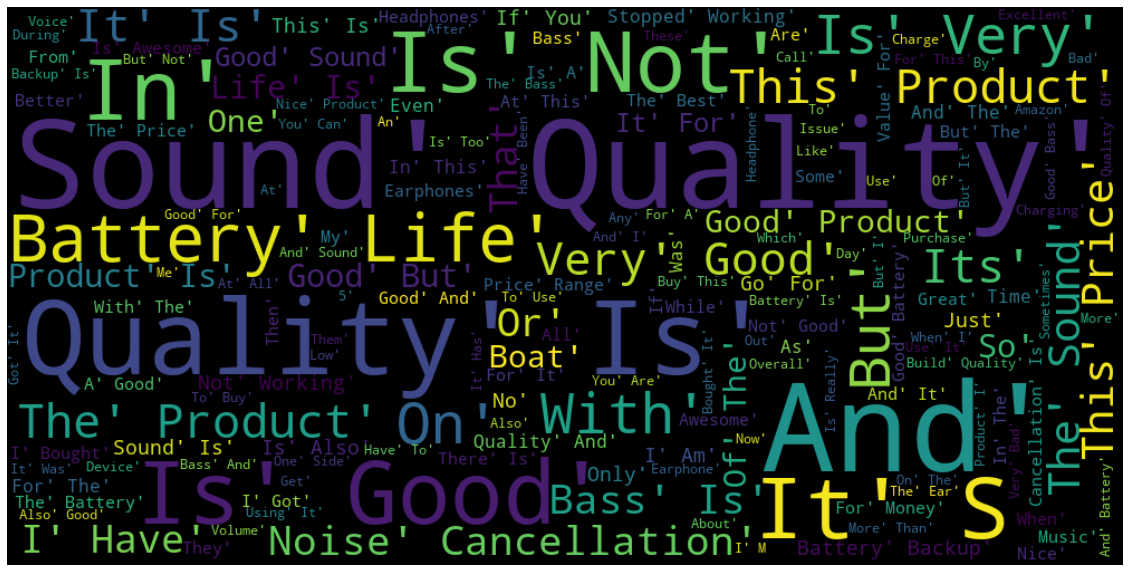

In [46]:
from wordcloud import WordCloud
from PIL import Image

listed = []
for i in range(0, len(boat255)):
    if boat255.Filter[i] != None:
        for item in boat255.Filter[i]:
            listed.append(item)
    else:
        continue
slist = str(listed)

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='black',
                min_font_size = 10).generate(slist)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

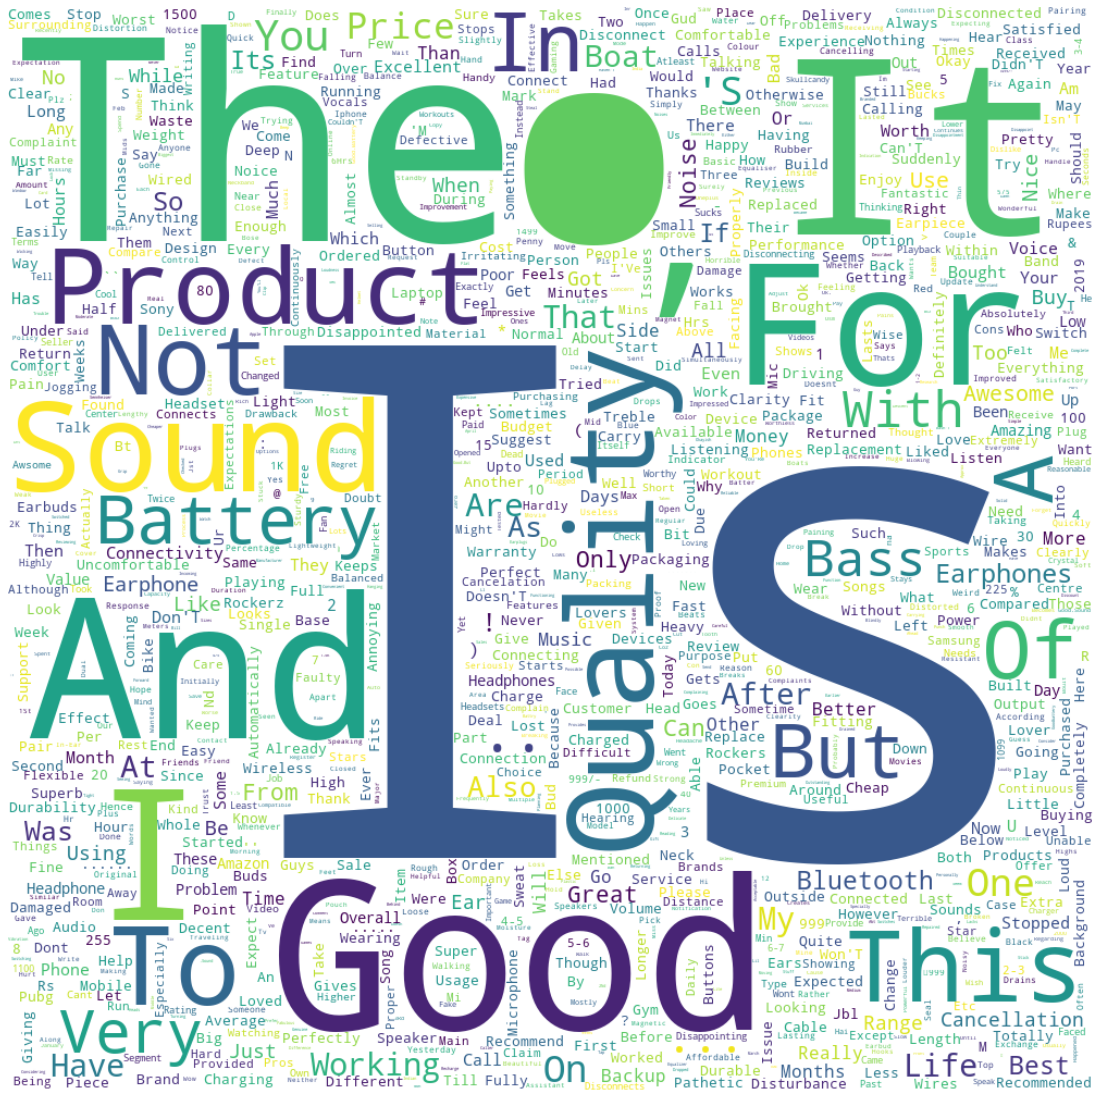

In [47]:
wordcloud = WordCloud(width=1000,height=1000, 
                      background_color ='white', 
                      max_words=1628, 
                      relative_scaling=1,normalize_plurals=False).generate_from_frequencies(top)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# The Same techniques can be applied for each product reviews

In [48]:
scores(df)

In [49]:
df.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No doubt it has a great bass and to a great ex...           3   
1  This  earphones are unreliable, i bought it be...           1   
2  i bought itfor 999,I purchased it second time,...           4   
3  Its sound quality is adorable. overall it was ...           1   
4  Its Awesome... Good sound quality & 8-9 hrs ba...           5   

            Product  Negative  Neutral  Positive  Compound  
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580  
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528  
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569  
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779  
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831

In [50]:
cls(df)

In [51]:
df.head()

ReviewTitle  \
0             Honest review of an edm music lover\n   
1             Unreliable earphones with high cost\n   
2                        Really good and durable.\n   
3                 stopped working in just 14 days\n   
4  Just Awesome Wireless Headphone under 1000...😉\n   

                                          ReviewBody  ReviewStar  \
0  No doubt it has a great bass and to a great ex...           3   
1  This  earphones are unreliable, i bought it be...           1   
2  i bought itfor 999,I purchased it second time,...           4   
3  Its sound quality is adorable. overall it was ...           1   
4  Its Awesome... Good sound quality & 8-9 hrs ba...           5   

            Product  Negative  Neutral  Positive  Compound Sentiment_Score  
0  boAt Rockerz 255     0.268    0.657     0.075   -0.9580        Negative  
1  boAt Rockerz 255     0.073    0.884     0.043   -0.2528        Negative  
2  boAt Rockerz 255     0.021    0.928     0.052    0.5569        Positive  
3  boAt Rockerz 255     0.061    0.833     0.105    0.1779        Positive  
4  boAt Rockerz 255     0.093    0.760     0.147    0.2831        Positive

In [52]:
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import re

# lemmatizer = WordNetLemmatizer()
# def CleanString(x):
#     corpus = []
#     for i in range(0, len(x)):
#         review = re.sub('[^a-zA-Z]', ' ', str(x.ReviewBody[i]))
#         review = review.split()
#         review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
#         review = ' '.join(review)
#         corpus.append(review)
#     x["ReviewBody"]=corpus

In [53]:
# CleanString(df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sentiment_Score', ylabel='count'>

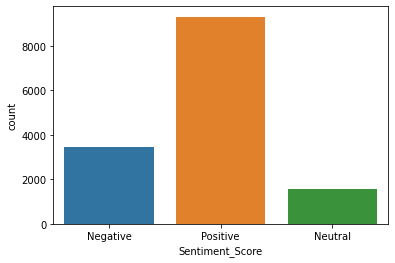

In [54]:
import seaborn as sns

sns.countplot(df['Sentiment_Score'])

There Is Imbalance In Data Need to Balance

In [55]:
df2 = df[['ReviewBody', 'Sentiment_Score']]

In [56]:
df2[df2['Sentiment_Score']=='Negative'].head(100)

ReviewBody Sentiment_Score
0    No doubt it has a great bass and to a great ex...        Negative
1    This  earphones are unreliable, i bought it be...        Negative
7    After one month usage reviewing this .Pros-1- ...        Negative
9    The product durability is 1 month..I just lost...        Negative
13           Product stopped working in a month time\n        Negative
14   Right speaker is not working at all. Useless p...        Negative
18   Below average product. Not happy at all.Pros :...        Negative
23    Rightside speaker stop working within 20 days.\n        Negative
26   Defective product. Not working, had to return ...        Negative
29                                 Battery is faulty\n        Negative
30   Boat blue tooth 255, ye doubt Voice quality is...        Negative
33   The headphones were good at the beginning but ...        Negative
36   The item has been rendered defective three tim...        Negative
37   Purchased it for 999. And the price does justi...        Negative
38   The reason for this being an average product i...        Negative
39   Its grear earphones. I was sceptical when i bo...        Negative
48                                     Worst product\n        Negative
51   Totally disappointed with the product and retu...        Negative
53   Really like the base and sound quality for thi...        Negative
55   Very bad it's been only 3 months and it's one ...        Negative
57                            Sound quality is worst\n        Negative
58   Got the delivery today(12/12/2018)Initial Impr...        Negative
59   Hi, i bought this for 1500 from amazon but to ...        Negative
70   The wire from the band to the ears is too long...        Negative
76                                  Pathetic quality\n        Negative
79   I buyed the product and it stopped working aft...        Negative
80   I’ve been using this for past few months now.A...        Negative
82   Boat rockerz BT headphone.1. Product quality i...        Negative
83   I have been using the headset for 2 months. Th...        Negative
85   I don't usually write reviews for products but...        Negative
91   Good for a few weeks. After that the battery h...        Negative
99   Would have used hardly for 5 to 8 hours since ...        Negative
102  Dont go for this product. I have seen the revi...        Negative
107  Got these in sale and very disappointed. I had...        Negative
111  I love these Earphones.My battery lasted from ...        Negative
116  I was looking for a pair of bluetooth earphone...        Negative
119  my  ear is goes out of order ,i am placing on ...        Negative
127  Sound quality isn't that good. Not worth the c...        Negative
136  Sound quality is good for music only... batter...        Negative
138  Product STOPPED working in just 20 days useles...        Negative
141  I've been using it on runs for the last month ...        Negative
142  It's been 5 days only that I have bought this ...        Negative
146  Never used a boAt product before this one, but...        Negative
150  I bought this product after a long wait for dr...        Negative
154  Product is average.. ear buds clip sizes diffe...        Negative
162  Good build quality at this price range. Sound ...        Negative
170  Overall:  Decent product, not worth the cost.I...        Negative
171  Issues.Cinnectivity.---------------The Bluetoo...        Negative
175  Firstly the voice quality of the product is ve...        Negative
180  Didnt fit my expectations,sound quality is goo...        Negative
183  Please don't buy this product. Only after usin...        Negative
184  I'm not happy that boat made these sub par hea...        Negative
187   Bass is extremely good. No doubt. mic clarity...        Negative
192  Damaged Product and Packaging.Though this item...        Negative
201  after using it for 4 weeks it has stopped work...        Negative
207  After 15 days of research I ordered this produ...        Negati

In [61]:
X = df2.ReviewBody
X = X.values.reshape(-1, 1).tolist()
y = df2['Sentiment_Score']

In [62]:
print(X)

[['No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.\n'], ['This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks.\n'], ['i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I c

In [63]:
# Applying over-sampling module RandomOverSampler to balance the data.
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
X_smote,y_smote = smote.fit_resample(X,y)
print(y_smote.value_counts())
print(len(X_smote))
print(len(y_smote))

Neutral     9309
Positive    9309
Negative    9309
Name: Sentiment_Score, dtype: int64
27927
27927


In [64]:
data1 = pd.DataFrame(X_smote, columns=['Review'])
data2 = pd.DataFrame(y_smote)

In [65]:
df3 = pd.concat([data1, data2.reindex(data1.index)], axis=1)

In [66]:
df3[df3['Sentiment_Score']=='Negative'].head(100)

Review Sentiment_Score
0    No doubt it has a great bass and to a great ex...        Negative
1    This  earphones are unreliable, i bought it be...        Negative
7    After one month usage reviewing this .Pros-1- ...        Negative
9    The product durability is 1 month..I just lost...        Negative
13           Product stopped working in a month time\n        Negative
14   Right speaker is not working at all. Useless p...        Negative
18   Below average product. Not happy at all.Pros :...        Negative
23    Rightside speaker stop working within 20 days.\n        Negative
26   Defective product. Not working, had to return ...        Negative
29                                 Battery is faulty\n        Negative
30   Boat blue tooth 255, ye doubt Voice quality is...        Negative
33   The headphones were good at the beginning but ...        Negative
36   The item has been rendered defective three tim...        Negative
37   Purchased it for 999. And the price does justi...        Negative
38   The reason for this being an average product i...        Negative
39   Its grear earphones. I was sceptical when i bo...        Negative
48                                     Worst product\n        Negative
51   Totally disappointed with the product and retu...        Negative
53   Really like the base and sound quality for thi...        Negative
55   Very bad it's been only 3 months and it's one ...        Negative
57                            Sound quality is worst\n        Negative
58   Got the delivery today(12/12/2018)Initial Impr...        Negative
59   Hi, i bought this for 1500 from amazon but to ...        Negative
70   The wire from the band to the ears is too long...        Negative
76                                  Pathetic quality\n        Negative
79   I buyed the product and it stopped working aft...        Negative
80   I’ve been using this for past few months now.A...        Negative
82   Boat rockerz BT headphone.1. Product quality i...        Negative
83   I have been using the headset for 2 months. Th...        Negative
85   I don't usually write reviews for products but...        Negative
91   Good for a few weeks. After that the battery h...        Negative
99   Would have used hardly for 5 to 8 hours since ...        Negative
102  Dont go for this product. I have seen the revi...        Negative
107  Got these in sale and very disappointed. I had...        Negative
111  I love these Earphones.My battery lasted from ...        Negative
116  I was looking for a pair of bluetooth earphone...        Negative
119  my  ear is goes out of order ,i am placing on ...        Negative
127  Sound quality isn't that good. Not worth the c...        Negative
136  Sound quality is good for music only... batter...        Negative
138  Product STOPPED working in just 20 days useles...        Negative
141  I've been using it on runs for the last month ...        Negative
142  It's been 5 days only that I have bought this ...        Negative
146  Never used a boAt product before this one, but...        Negative
150  I bought this product after a long wait for dr...        Negative
154  Product is average.. ear buds clip sizes diffe...        Negative
162  Good build quality at this price range. Sound ...        Negative
170  Overall:  Decent product, not worth the cost.I...        Negative
171  Issues.Cinnectivity.---------------The Bluetoo...        Negative
175  Firstly the voice quality of the product is ve...        Negative
180  Didnt fit my expectations,sound quality is goo...        Negative
183  Please don't buy this product. Only after usin...        Negative
184  I'm not happy that boat made these sub par hea...        Negative
187   Bass is extremely good. No doubt. mic clarity...        Negative
192  Damaged Product and Packaging.Though this item...        Negative
201  after using it for 4 weeks it has stopped work...        Negative
207  After 15 days of research I ordered this produ...        Negative
2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sentiment_Score', ylabel='count'>

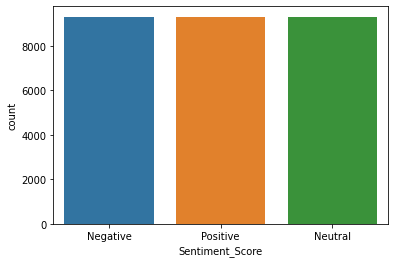

In [67]:
sns.countplot(df3['Sentiment_Score'])

In [90]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=0, shuffle=True)

In [91]:
for train, test in kf.split(df3):
    print('Train:', train)
    print('Test:', test,'\n')

Train: [    0     1     2 ... 27918 27920 27921]
Test: [    4     7    18 ... 27924 27925 27926] 

Train: [    0     2     4 ... 27924 27925 27926]
Test: [    1     3     8 ... 27914 27916 27917] 

Train: [    1     3     4 ... 27924 27925 27926]
Test: [    0     2     5 ... 27898 27906 27915] 

Train: [    0     1     2 ... 27924 27925 27926]
Test: [   11    21    23 ... 27908 27909 27921] 

Train: [    0     1     2 ... 27924 27925 27926]
Test: [   10    13    19 ... 27911 27918 27920] 



In [92]:
from sklearn.model_selection import train_test_split
df3_train, df3_test = train_test_split(df3[['Review', 'Sentiment_Score']])

In [93]:
df3_train.head()

Review Sentiment_Score
20869  Not suitable for gamingAnd audio quality is cr...         Neutral
1668   This earphones work absolutely good as per my ...        Positive
22688             excelent product.great sound quality\n         Neutral
9452   Good sound quality.but not recommended for lon...        Positive
6602                Battery life performance in 2 days\n         Neutral

In [94]:
# Convert dataframe to list of tuples
df3_train = df3_train.to_records(index=False)
df3_test = df3_test.to_records(index=False)

In [95]:
df3_train

rec.array([('Not suitable for gamingAnd audio quality is cranky\n', 'Neutral'),
           ('This earphones work absolutely good as per my expectations. Price is also pretty less. Recommend it to all.\n', 'Positive'),
           ('excelent product.great sound quality\n', 'Neutral'), ...,
           ("Base is low. Mike doesn't catch your voice in crowded place. Ok if you get it in 2k to 3k\n", 'Neutral'),
           ("I've been searching for a good earphone when I make calls. Esp international Internet calls. I always get told that the microphone was not good. So finally I came across this. And it's been working great so far.\n", 'Positive'),
           ("This was not a genuine product very upset with amazon..same product with same sound quality i had seen on road worth Rs 499.....i always buy from amazon..but this time amazon just break my trust...i only use JBL earphones..so in know the sound quality ...please don't do this.\n", 'Negative')],
          dtype=[('Review', 'O'), ('Sentim

In [97]:
# Creating the pipeline
# 1st function is creating the BagofWords
# 2nd function is the naive bayes predictor
import math
from creme import compose
from creme import feature_extraction
from creme import naive_bayes
from creme import linear_model
from creme import optim
import creme

model = compose.Pipeline(
    ('tokenize', feature_extraction.BagOfWords(lowercase=False)),
    ('nb', naive_bayes.MultinomialNB(alpha=1))
)

In [98]:
from creme import metrics
metric=metrics.Accuracy()
# Training the model row by row
for sentence, label in df3_train:
    model = model.fit_one(sentence, label)
    y_pred = model.predict_one(sentence)
    metric = metric.update(label, y_pred)  

In [99]:
### Training Data Accuracy
metric

Accuracy: 85.45%

In [100]:
### test Data Accuracy
test_metric=metrics.Accuracy()
for sentence, label in df3_test:
    y_pred = model.predict_one(sentence)
    test_metric = metric.update(label, y_pred)

In [101]:
### test Metric
test_metric

Accuracy: 84.58%

In [102]:
# Sample Prediction
model.predict_one("What a inferior class product, enjoy full lag audio, struggle to talk to friends, enjoy ambient noise, have fun with frequent disconnection, two bluetooth? Mouse and earphone, enjoy one going off for sure, sound quality just ok, backup expect 1/4, say thanks if you return it and promise never to buy again.")

'Positive'

In [103]:
Analyzer.polarity_scores("What a inferior class product, enjoy full lag audio, struggle to talk to friends, enjoy ambient noise, have fun with frequent disconnection, two bluetooth? Mouse and earphone, enjoy one going off for sure, sound quality just ok, backup expect 1/4, say thanks if you return it and promise never to buy again.")

{'neg': 0.103, 'neu': 0.541, 'pos': 0.356, 'compound': 0.9538}

In [104]:
model.predict_one("Nothing I liked with this product. Very worst I had , better and more improvement is required to satisfy customer need. I prefer not to buy this..If I'm wrong, I please my sorry for respective owners..")

'Negative'

In [105]:
Analyzer.polarity_scores("Nothing I liked with this product. Very worst I had , better and more improvement is required to satisfy customer need. I prefer not to buy this..If I'm wrong, I please my sorry for respective owners..")

{'neg': 0.233, 'neu': 0.461, 'pos': 0.305, 'compound': 0.5317}

In [106]:
model.predict_one("The service and response time of Ptron customer support is pathetic. I'll never recommend ptron brand to anyone in my entire life.I purchased ptron tangent lite neckband, after a month headphones not working and i claimed for replacement. Ptron suggest me to courier product to talagana address on my own cost,after receiving product they will check product and provide replacement after 15 days. And the worst part is the only way to connect with them is Email and reponse time 5/6 days or may be more then a week.In short please do not buy any Ptron product. Recommend boat, the cost may be high but they provide door to door replacement warranty.you no need to warry about any thing you have to make a request only.")

'Negative'

In [107]:
model.predict_one("I started using these earphones in December last year and it has hardly been 10 months of use and now there is no sound in the left earpiece. Batterylife was never great. Eventhough it says 1 year warranty it's a SCAM. I have tried calling the seller and visited the boatsupport website but no help provided by them. Kindly refrain from buying these.")

'Negative'

In [108]:
model.predict_one("This place is honestly one of my happy places... as stupid as that sounds. My sister brought me here when I was SUPER little and told me that this Nordstrom cafe had some of the best food and one of the best views in the city. She was not lying and I still come here by myself all the time. The food is honestly great... you wouldn't expect that from a Nordstrom restaurant. I have had tons of stuff from their menu and would recommend all of it. The crab salad is great, French onion soup, calamari, and bread pudding. The price is reasonable and if you use your Nordstrom card you get points (woot!) I absolutely love the view of Powell street... it inspires me to keep shopping after lunch! I bring friends here all the time too and they like it. It is not crowded (like the madhouse that is the Cheesecake Factory) so it is a great place to get together with friends. I would highly recommend it!")

'Positive'

In [109]:
model.predict_one("Nit really a great restaurant. I have lived 5 years in San Francisco and this is the worst Chinese restaurant I've ever eaten while I have been here. The food was bland, with very little flavor and we are pretty sure that the scallion pancakes were reheated. Not a fan, at all.")

'Positive'

In [111]:
Analyzer.polarity_scores("Nit really a great restaurant. I have lived 5 years in San Francisco and this is the worst Chinese restaurant I've ever eaten while I have been here. The food was bland, with very little flavor and we are pretty sure that the scallion pancakes were reheated. Not a fan, at all.")

{'neg': 0.105, 'neu': 0.725, 'pos': 0.171, 'compound': 0.5901}

In [110]:
model.predict_one("I found Zaprian from reading his previous reviews on here. Even though I read reviews often I rarely take the time to write one unless the quality of service was so exceptional I felt the need to share it so everyone can read. I honestly cannot recommend Zaprian enough; he is truly a lifesaver! Even though he was booked out for 5 weeks, he could sense the desperation in my voice & came by after his work day to help me out. His knowledge and integrity are truly unmatched! He managed to troubleshoot my problem within record time and provided a solution to rectify the job. Because of Zaprian the final result of our kitchen flooring came out perfect. I am so happy I decided to go to Zaprian. As a real estate broker & investor I've worked with quite a few contractors here in the Bay Area & I have to say that Zaprian is hands down the best. If you are looking for a tile expert, look no further, Z is definitely your guy!!")

'Positive'

In [115]:
model.predict_one('not so good')

'Negative'

In [ ]:
import inspect

print(inspect.getsource(creme))

In [ ]:
from creme import sampling
sampling.HardSamplingClassifier